In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
df = yf.download('NVDA', start='2010-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [4]:
#Lag returns (lags = days I want to go back) 

def lagret(df, lags):
    names = []
    for i in range(1, lags+1):
        df['Lag_'+str(i)] = df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

lagnames= lagret(df, 3)

In [5]:
df.dropna(inplace=True)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(df[lagnames], df['returns'])

LinearRegression()

In [9]:
df['prediction_LR'] = model.predict(df[lagnames])

In [10]:
df

Price,Close,High,Low,Open,Volume,returns,Lag_1,Lag_2,Lag_3,prediction_LR
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,
Date,,,,,,,,,,
2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000,0.002159,-0.019792,0.006376,0.014497,0.002545
2010-01-11,0.419270,0.429356,0.413309,0.427522,556612000,-0.014115,0.002159,-0.019792,0.006376,0.000736
2010-01-12,0.405057,0.414685,0.396346,0.413080,627432000,-0.034486,-0.014115,0.002159,-0.019792,0.002884
2010-01-13,0.410559,0.411934,0.391991,0.407808,508868000,0.013491,-0.034486,-0.014115,0.002159,0.002987
2010-01-14,0.404140,0.408496,0.397263,0.405516,608524000,-0.015757,0.013491,-0.034486,-0.014115,0.000134
...,...,...,...,...,...,...,...,...,...,...
2025-07-09,162.880005,164.419998,161.160004,161.220001,183656400,0.017840,0.011061,-0.006927,0.013203,0.000497
2025-07-10,164.100006,164.500000,161.610001,164.320007,167704100,0.007462,0.017840,0.011061,-0.006927,0.001140


In [11]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]

In [12]:
df['strat_LR'] = df['direction_LR'] * df['returns']

In [13]:
np.exp(df[['returns','strat_LR']].sum())

Price     Ticker
returns              402.356653
strat_LR            1405.607645
dtype: float64

<Axes: xlabel='Date'>

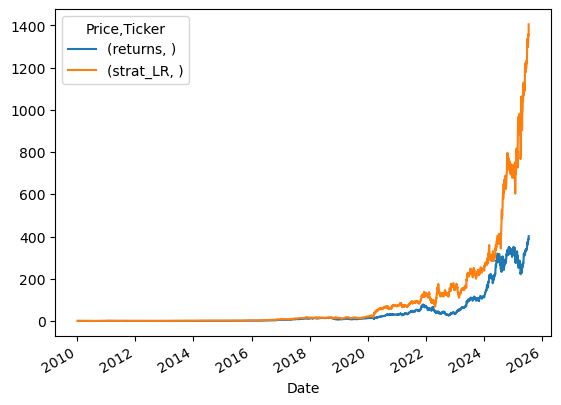

In [14]:
np.exp(df[['returns','strat_LR']].cumsum()).plot()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#random state needed to replicate split

train,test = train_test_split(df, shuffle=False,
                              test_size=0.3, random_state=0)

In [17]:
train = train.copy()

In [18]:
test = test.copy()

In [19]:
model = LinearRegression()

In [20]:
train

Price,Close,High,Low,Open,Volume,returns,Lag_1,Lag_2,Lag_3,prediction_LR,direction_LR,strat_LR
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,,,
Date,,,,,,,,,,,,
2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000,0.002159,-0.019792,0.006376,0.014497,0.002545,1,0.002159
2010-01-11,0.419270,0.429356,0.413309,0.427522,556612000,-0.014115,0.002159,-0.019792,0.006376,0.000736,1,-0.014115
2010-01-12,0.405057,0.414685,0.396346,0.413080,627432000,-0.034486,-0.014115,0.002159,-0.019792,0.002884,1,-0.034486
2010-01-13,0.410559,0.411934,0.391991,0.407808,508868000,0.013491,-0.034486,-0.014115,0.002159,0.002987,1,0.013491
2010-01-14,0.404140,0.408496,0.397263,0.405516,608524000,-0.015757,0.013491,-0.034486,-0.014115,0.000134,1,-0.015757
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,14.117703,14.296169,13.949209,14.120197,319028000,0.026169,0.057804,0.034280,0.003723,-0.000545,-1,-0.026169
2020-11-06,14.518504,14.545174,13.853497,14.067605,383348000,0.027994,0.026169,0.057804,0.034280,0.001198,1,0.027994


In [21]:
#Fit model to train dataset, lagnames = features, returns = dependent variable

model.fit(train[lagnames], train['returns'])

LinearRegression()

In [22]:
test['prediction_LR'] = model.predict(test[lagnames])

In [23]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [24]:
test['strat_LR'] = test['direction_LR'] * test['returns']

In [25]:
np.exp(test[['returns','strat_LR']].sum())

Price     Ticker
returns             12.761700
strat_LR            11.000135
dtype: float64

<Axes: xlabel='Date'>

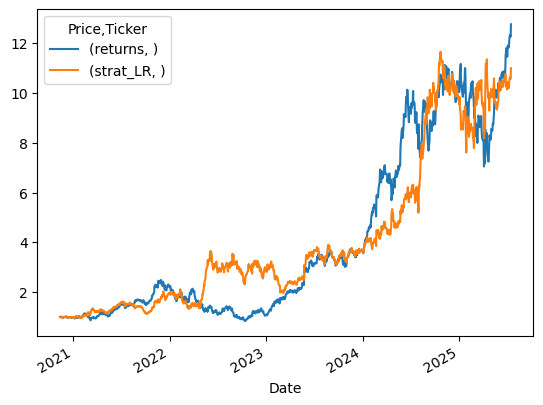

In [26]:
np.exp(test[['returns','strat_LR']].cumsum()).plot()